In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [3]:
data=pd.read_csv("cs-training.csv")

In [4]:
data.rename(columns={
    'SeriousDlqin2yrs':'是否在未来两年发生严重违约',
    'RevolvingUtilizationOfUnsecuredLines':'循环信贷额度使用率',
    'age':'年龄',
    'NumberOfTime30-59DaysPastDueNotWorse':'过去30-59天逾期次数',
    'DebtRatio':'负债收入比',
    'MonthlyIncome':'月收入',
    'NumberOfOpenCreditLinesAndLoans':'当前信贷账户数量',
    'NumberOfTimes90DaysLate':'过去90天以上逾期次数',
    'NumberRealEstateLoansOrLines':'房产相关贷款数量',
    'NumberOfTime60-89DaysPastDueNotWorse':'过去60-89天逾期次数',
    'NumberOfDependents':'家庭赡养人数'
},inplace=True)
data.head()

,Unnamed: 0,是否在未来两年发生严重违约,循环信贷额度使用率,年龄,过去30-59天逾期次数,负债收入比,月收入,当前信贷账户数量,过去90天以上逾期次数,房产相关贷款数量,过去60-89天逾期次数,家庭赡养人数
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
#检查缺失值
data.isnull().sum()

Unnamed: 0           0
是否在未来两年发生严重违约        0
循环信贷额度使用率            0
年龄                   0
过去30-59天逾期次数         0
负债收入比                0
月收入              29731
当前信贷账户数量             0
过去90天以上逾期次数          0
房产相关贷款数量             0
过去60-89天逾期次数         0
家庭赡养人数            3924
dtype: int64

In [6]:
#月收入和家庭负担的缺失值用中位数填充
data['月收入'].fillna(data['月收入'].median(),inplace=True)
data['家庭赡养人数'].fillna(data['家庭赡养人数'].median(),inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_19756\1881927071.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['月收入'].fillna(data['月收入'].median(),inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_19756\1881927071.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [7]:
#再次检查缺失值
data.isnull().sum()

Unnamed: 0       0
是否在未来两年发生严重违约    0
循环信贷额度使用率        0
年龄               0
过去30-59天逾期次数     0
负债收入比            0
月收入              0
当前信贷账户数量         0
过去90天以上逾期次数      0
房产相关贷款数量         0
过去60-89天逾期次数     0
家庭赡养人数           0
dtype: int64

In [8]:
data['是否在未来两年发生严重违约'].value_counts(normalize=True)

是否在未来两年发生严重违约
0    0.93316
1    0.06684
Name: proportion, dtype: float64

单变量风险分析

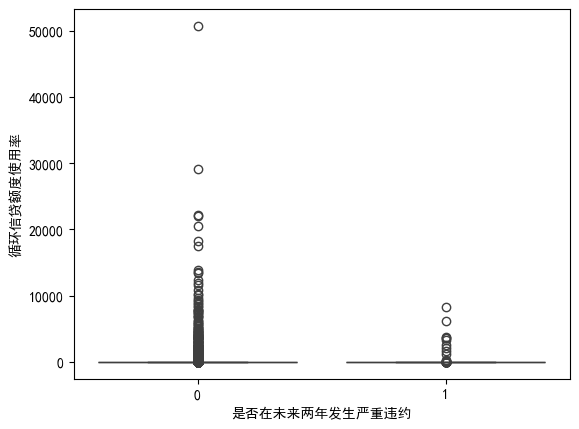

In [9]:
#循环信贷额度使用率vs违约
sns.boxplot(x='是否在未来两年发生严重违约',y='循环信贷额度使用率',data=data)
plt.show()

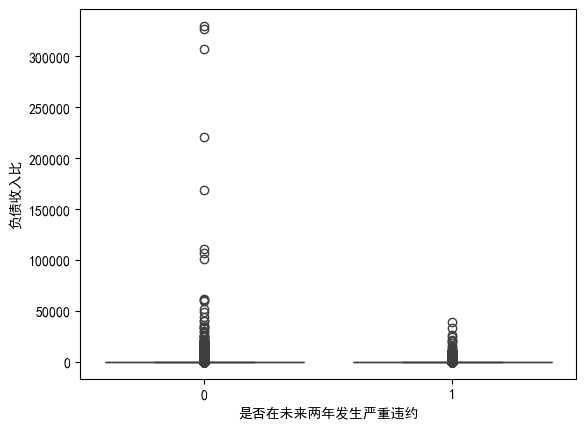

In [10]:
#负债收入比vs违约
sns.boxplot(x='是否在未来两年发生严重违约',y='负债收入比',data=data)
plt.show()

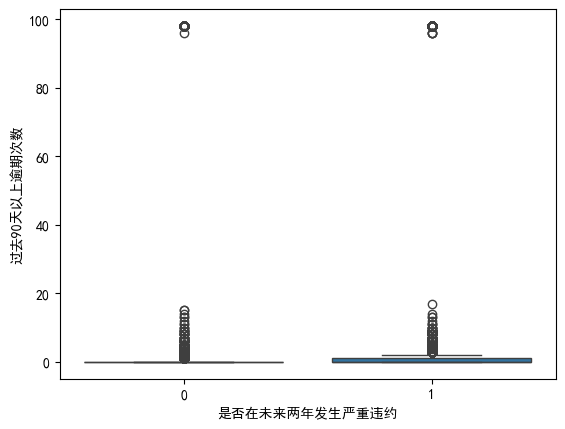

In [11]:
#历史逾期次数vs违约
sns.boxplot(x="是否在未来两年发生严重违约",y='过去90天以上逾期次数',data=data)
plt.show()

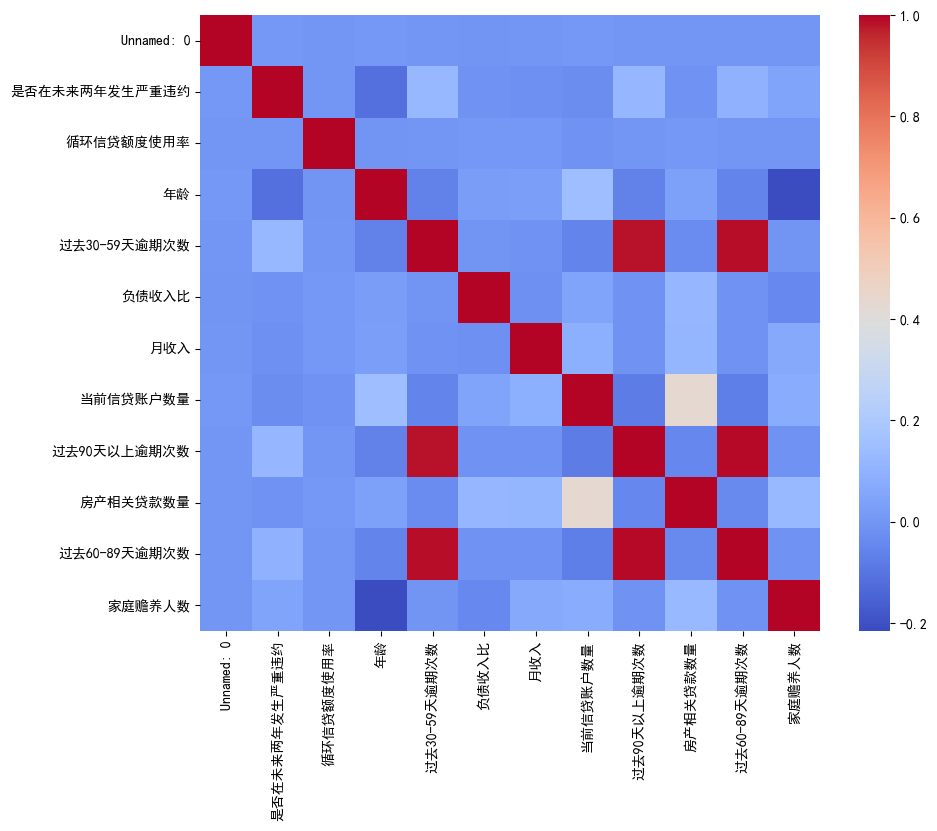

In [12]:
#相关性矩阵
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='coolwarm',annot=False)
plt.show()

In [13]:
#特征分布
data[['循环信贷额度使用率','负债收入比','月收入']].describe()

,循环信贷额度使用率,负债收入比,月收入
count,150000.000000,150000.000000,1.500000e+05
mean,6.048438,353.005076,6.418455e+03
std,249.755371,2037.818523,1.289040e+04
min,0.000000,0.000000,0.000000e+00
25%,0.029867,0.175074,3.903000e+03
50%,0.154181,0.366508,5.400000e+03
75%,0.559046,0.868254,7.400000e+03
max,50708.000000,329664.000000,3.008750e+06


建模评估

In [14]:
#划分特征和标签
X=data.drop(columns=['是否在未来两年发生严重违约'])
X=X.drop(columns=['Unnamed: 0'],errors='ignore')
y=data['是否在未来两年发生严重违约']

#划分训练集和测试集
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42,stratify=y
)

In [15]:
#特征标准化
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [16]:
#训练逻辑回归模型
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [17]:
#模型预测
y_pred=model.predict(x_test_scaled)
y_prob=model.predict_proba(x_test_scaled)[:,1]
#评估指标
from sklearn.metrics import classification_report,roc_auc_score

print(classification_report(y_test,y_pred))
print("AUC:",roc_auc_score(y_test,y_prob))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87     27995
           1       0.18      0.67      0.29      2005

    accuracy                           0.78     30000
   macro avg       0.58      0.73      0.58     30000
weighted avg       0.92      0.78      0.83     30000

AUC: 0.8021466604964638


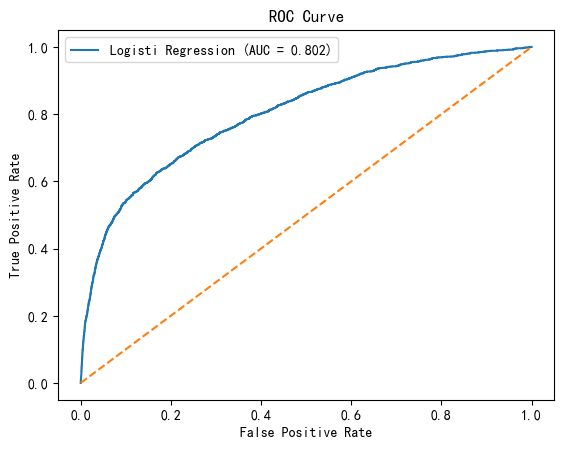

In [18]:
#ROC曲线
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_test,y_prob)
plt.figure()
plt.plot(fpr,tpr,label='Logisti Regression (AUC = %0.3f)'%roc_auc_score(y_test,y_prob))
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [34]:
new_data=pd.read_csv('cs-test.csv')
new_data.rename(columns={
    'SeriousDlqin2yrs':'是否在未来两年发生严重违约',
    'RevolvingUtilizationOfUnsecuredLines':'循环信贷额度使用率',
    'age':'年龄',
    'NumberOfTime30-59DaysPastDueNotWorse':'过去30-59天逾期次数',
    'DebtRatio':'负债收入比',
    'MonthlyIncome':'月收入',
    'NumberOfOpenCreditLinesAndLoans':'当前信贷账户数量',
    'NumberOfTimes90DaysLate':'过去90天以上逾期次数',
    'NumberRealEstateLoansOrLines':'房产相关贷款数量',
    'NumberOfTime60-89DaysPastDueNotWorse':'过去60-89天逾期次数',
    'NumberOfDependents':'家庭赡养人数'
},inplace=True)
new_data=new_data.drop(columns=['是否在未来两年发生严重违约'])
new_data=new_data.drop(columns=['Unnamed: 0'],errors='ignore')

In [35]:
new_data.isnull().sum()

循环信贷额度使用率           0
年龄                  0
过去30-59天逾期次数        0
负债收入比               0
月收入             20103
当前信贷账户数量            0
过去90天以上逾期次数         0
房产相关贷款数量            0
过去60-89天逾期次数        0
家庭赡养人数           2626
dtype: int64

In [36]:
new_data['月收入'].fillna(data['月收入'].median(),inplace=True)
new_data['家庭赡养人数'].fillna(data['家庭赡养人数'].median(),inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_19756\2699408002.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data['月收入'].fillna(data['月收入'].median(),inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_19756\2699408002.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [37]:
new_data_scaled=scaler.transform(new_data)
prob_default=model.predict_proba(new_data_scaled)[:,1]
prediction=model.predict(new_data_scaled)

In [39]:
new_data['违约概率']=prob_default
new_data['是否预测违约']=prediction
high_risk=new_data.sort_values(by='违约概率',ascending=False)
print(high_risk.head(20))

        循环信贷额度使用率  年龄  过去30-59天逾期次数      负债收入比     月收入  当前信贷账户数量  过去90天以上逾期次数  \
83532         1.0  44            98   0.000000  5400.0         0           98   
10536         1.0  31            98   0.000000  2576.0         0           98   
25345         1.0  35            98   0.000000  5400.0         0           98   
15690         1.0  43            98   0.001428  2100.0         0           98   
14622         1.0  65            98   0.000000  5400.0         0           98   
87222         1.0  22            98   0.000000  1300.0         0           98   
100653        1.0  22            98   0.000000  5400.0         0           98   
25378         1.0  22            98   0.000000  5400.0         0           98   
703           1.0  23            98   0.000000  5400.0         0           98   
55338         1.0  25            98   0.000000  5400.0         0           98   
43062         1.0  28            98   0.000000  4800.0         0           98   
80345         1.0  25       